### **Objective:** 
To understand and gain insights from a retail dataset by performing various exploratory data analyses, data visualization, and data modelling.

### **Dataset Columns:**

- **InvoiceNo:** Invoice number. A unique number per invoice.
- **StockCode:** Product code. A unique number per product.
- **Description:** Product description.
- **Quantity:** The number of products sold per invoice.
- **InvoiceDate:** The date and time of the invoice.
- **UnitPrice:** The price of one unit of the product.
- **CustomerID:** Customer identification number.
- **Country:** The country where the customer resides.


## 1. Data Preprocessing and Cleaning:


1.1. Import necessary libraries and read the dataset:

In [1]:
# Import all the necessory libraries
import numpy as np                     # linear algebra
import pandas as pd                    # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt        #visualization
%matplotlib inline

import seaborn as sns                  #visualization
import plotly.offline as py            #visualization
import plotly.graph_objs as go         #visualization
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the sales data
df = pd.read_csv("Sales_data.csv",encoding='latin-1')

1.2. Display the top 10 rows of the dataframe:

In [3]:
# data overview
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
InvoiceNo,536365,536365,536365,536365,536365,536365,536365,536366,536366,536367
StockCode,85123A,71053,84406B,84029G,84029E,22752,21730,22633,22632,84879
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,ASSORTED COLOUR BIRD ORNAMENT
Quantity,6,6,8,6,6,2,6,6,6,32
InvoiceDate,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:28,12/1/2010 8:28,12/1/2010 8:34
UnitPrice,2.55,3.39,2.75,3.39,3.39,7.65,4.25,1.85,1.85,1.69
CustomerID,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,17850.0,13047.0
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


1.3. Check for missing values:



In [4]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# check for the missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# after looking at the data, we have found that there are spaces instad of missing value
# replacing " " or any missing values with np.NaN
df = df.replace("  ", np.NaN)

In [7]:
# check for the missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

1.4. Convert the InvoiceDate column to datetime format:



In [8]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], infer_datetime_format=True)

In [9]:
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

1.5. Add a new column 'TotalPrice' to the dataframe which is the product of 'UnitPrice' and 'Quantity':



In [10]:
df['TotalPrice'] = df['UnitPrice'] * df['Quantity']

## 2. Exploratory Data Analysis:


2.1. How many unique products are there in the dataset?


In [11]:
unique_products = df['StockCode'].nunique()

In [12]:
#unique_products

2.2. Which are the top 10 products (using StockCode) sold by quantity?



In [13]:
top_products = df.groupby('StockCode')['Quantity'].sum().reset_index()

top_products

,StockCode,Quantity
0,10002,1037
1,10080,495
2,10120,193
3,10123C,-13
4,10123G,-38
...,...,...
4065,gift_0001_20,20
4066,gift_0001_30,37
4067,gift_0001_40,3
4068,gift_0001_50,4


2.3. How many unique customers are there in the dataset?



In [14]:
unique_customers = df['CustomerID'].nunique()
unique_customers

4372

2.4. Which country has the maximum number of unique customers?



In [15]:
# Grouping by 'Country' and counting unique 'CustomerID' for each country
unique_customers_by_country = df.groupby('Country')['CustomerID'].nunique()

# Finding the country with the maximum unique customers
max_country = unique_customers_by_country.idxmax()
max_customers = unique_customers_by_country.max()

In [16]:
max_customers

3950

In [17]:
max_country

'United Kingdom'

2.5. Visualize the distribution of 'TotalPrice' using a histogram.



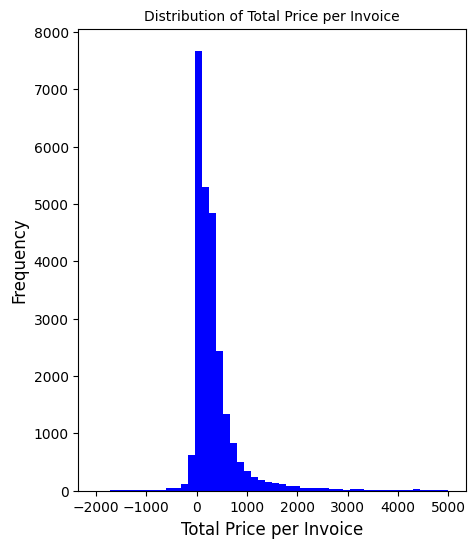

In [18]:
invoice_total = df.groupby('InvoiceNo')['TotalPrice'].sum()

# Plotting a histogram of the total price per invoice
plt.figure(figsize=(5, 6))
plt.hist(invoice_total, 50, range=[-2000, 5000], color='blue')

# Adding titles and labels
plt.title('Distribution of Total Price per Invoice', fontsize=10)
plt.xlabel('Total Price per Invoice', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Displaying the plot
plt.show()

## 3. Data Aggregation:


3.1. Compute the total sales (TotalPrice) per country.



In [19]:
total_price_per_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
total_price_per_country

,Country,TotalPrice
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


3.2. Identify the month in which the sales were highest.



In [20]:
df['Month'] = df['InvoiceDate'].dt.month
monthly_sales = df.groupby('Month')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
monthly_sales

#highest month sales
max_sales_month = monthly_sales.loc[monthly_sales['TotalPrice'].idxmax()]
max_sales_month


Month              11.00
TotalPrice    1461756.25
Name: 0, dtype: float64

3.3. Compute the average unit price per product.



In [21]:
average_unit_price_per_product = df.groupby('StockCode')['UnitPrice'].mean().sort_values(ascending=False).reset_index()
average_unit_price_per_product

,StockCode,UnitPrice
0,AMAZONFEE,7324.784706
1,CRUK,495.839375
2,M,375.566392
3,DOT,290.495859
4,BANK CHARGES,202.855162
...,...,...
4065,84526,0.000000
4066,72732,0.000000
4067,85018B,0.000000
4068,35824B,0.000000


3.4. Compute the total quantity sold per customer.



In [22]:
total_quantity_per_customer = df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).reset_index()
total_quantity_per_customer

,CustomerID,Quantity
0,14646.0,196719
1,12415.0,77242
2,14911.0,77180
3,17450.0,69029
4,18102.0,64122
...,...,...
4367,16252.0,-158
4368,16742.0,-189
4369,14213.0,-244
4370,15823.0,-283


## 4. Data Visualization:


4.1. Create a bar chart showcasing the sales (TotalPrice) for each country.



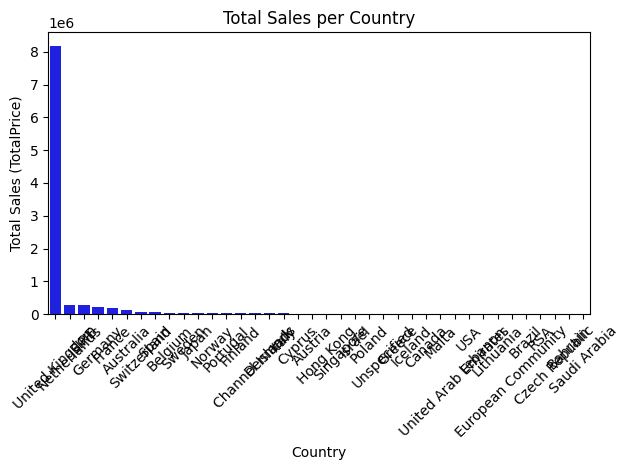

In [23]:

sns.barplot(x='Country', y='TotalPrice', data=total_price_per_country,color='blue')
plt.xlabel('Country')
plt.ylabel('Total Sales (TotalPrice)')
plt.title('Total Sales per Country')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()


4.2. Plot a line graph to showcase the trend of sales over time.



In [24]:
sales_over_time = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()
sales_over_time

InvoiceDate
2010-12-01    58635.56
2010-12-02    46207.28
2010-12-03    45620.46
2010-12-05    31383.95
2010-12-06    53860.18
                ...   
2011-12-05    57751.32
2011-12-06    54228.37
2011-12-07    75076.22
2011-12-08    81417.78
2011-12-09    32131.53
Name: TotalPrice, Length: 305, dtype: float64

Text(0.5, 1.0, 'Sales Trend Over Time')

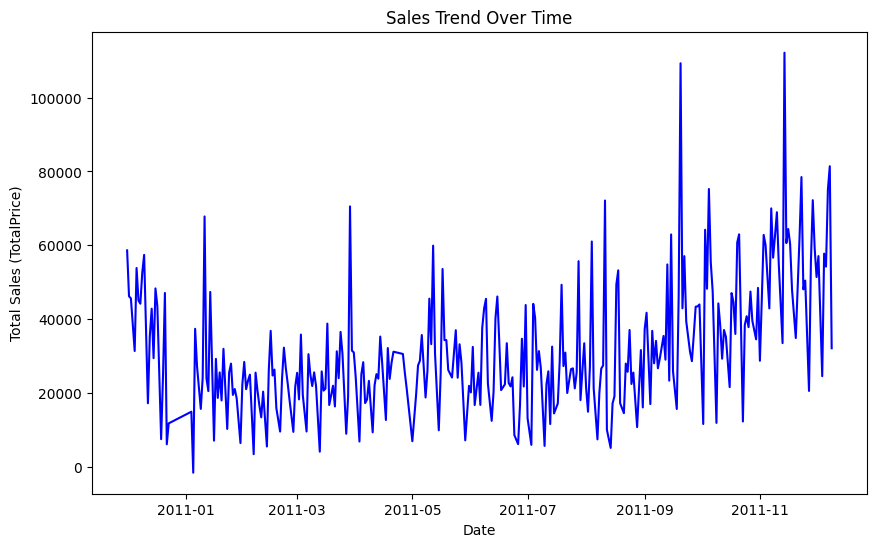

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time, color='blue')

plt.xlabel('Date')
plt.ylabel('Total Sales (TotalPrice)')
plt.title('Sales Trend Over Time')


4.3. Use a scatter plot to visualize the relationship between UnitPrice and Quantity.



Text(0.5, 1.0, 'Scatter Plot of Unit Price vs Quantity Sold')

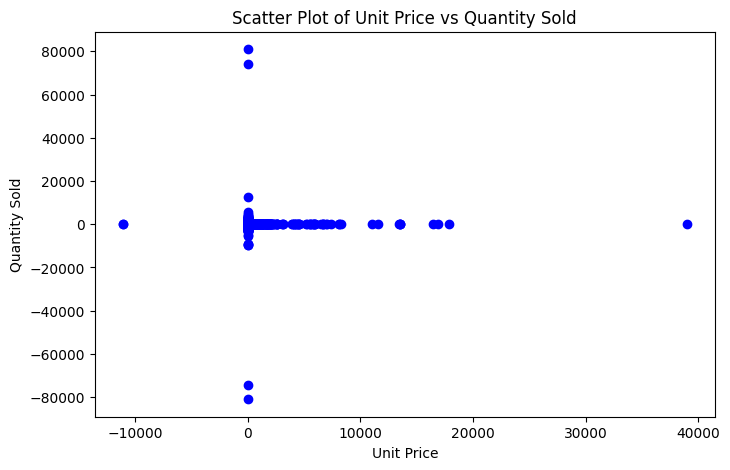

In [26]:
plt.figure(figsize=(8, 5))
plt.scatter(df['UnitPrice'], df['Quantity'],color='blue')

plt.xlabel('Unit Price')
plt.ylabel('Quantity Sold')
plt.title('Scatter Plot of Unit Price vs Quantity Sold')


4.4. Plot a heatmap to display the correlation between numeric columns.



In [27]:
#extracting numeric columns
df_num = df.select_dtypes("number")

#correlation
correlation = df_num.corr()

#tick labels
matrix_cols = correlation.columns.tolist()

#convert to array
corr_array  = np.array(correlation)

correlation

,Quantity,UnitPrice,CustomerID,TotalPrice,Month
Quantity,1.000000,-0.001235,-0.003600,0.886681,-0.001116
UnitPrice,-0.001235,1.000000,-0.004560,-0.162029,-0.000497
CustomerID,-0.003600,-0.004560,1.000000,-0.002274,0.030612
TotalPrice,0.886681,-0.162029,-0.002274,1.000000,0.000141
Month,-0.001116,-0.000497,0.030612,0.000141,1.000000


In [28]:
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

## 5. Advanced Analysis:


5.1. Identify potential outliers in the dataset for the Quantity and UnitPrice columns using appropriate visualization techniques.



Text(0.5, 0, 'Unit Price')

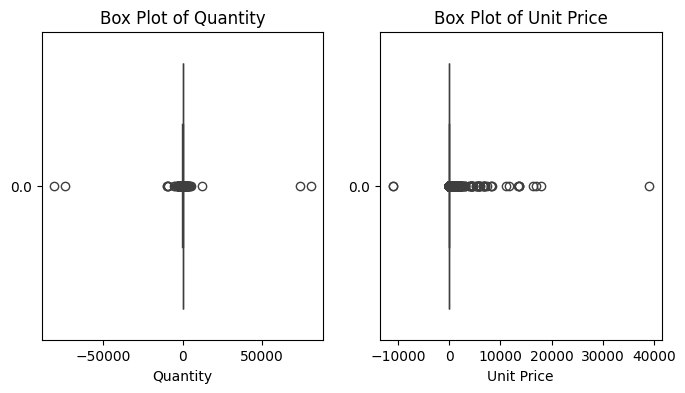

In [29]:
# Box plot for Quantity
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.boxplot(x=df['Quantity'],manage_ticks=True)
plt.title('Box Plot of Quantity')
plt.xlabel('Quantity')

# Box plot for UnitPrice
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.boxplot(x=df['UnitPrice'],manage_ticks=True)
plt.title('Box Plot of Unit Price')
plt.xlabel('Unit Price')

5.2. Segment customers based on their purchase history (Consider factors like total purchases, frequency of purchases, etc.).



In [30]:
#calculating the total purchases and counts the frequency of purchases.
customer_segments = df.groupby('CustomerID').agg(
    TotalPurchases=('TotalPrice', 'sum'),
    Frequency=('TotalPrice', 'count')
).reset_index()
customer_segments

,CustomerID,TotalPurchases,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [31]:
total_purchase_bins = pd.qcut(customer_segments['TotalPurchases'], q=3, labels=['Low', 'Medium', 'High'])
frequency_bins = pd.qcut(customer_segments['Frequency'], q=3, labels=['Low', 'Medium', 'High'])

# Add segments to the DataFrame
customer_segments['PurchaseSegment'] = total_purchase_bins
customer_segments['FrequencySegment'] = frequency_bins

# Display the resulting segmentation DataFrame
print(customer_segments)


      CustomerID  TotalPurchases  Frequency PurchaseSegment FrequencySegment
0        12346.0            0.00          2             Low              Low
1        12347.0         4310.00        182            High             High
2        12348.0         1797.24         31            High           Medium
3        12349.0         1757.55         73            High           Medium
4        12350.0          334.40         17             Low              Low
...          ...             ...        ...             ...              ...
4367     18280.0          180.60         10             Low              Low
4368     18281.0           80.82          7             Low              Low
4369     18282.0          176.60         13             Low              Low
4370     18283.0         2094.88        756            High             High
4371     18287.0         1837.28         70            High           Medium

[4372 rows x 5 columns]


5.3. For the top 5 products (by quantity sold), visualize their monthly sales trend.



In [32]:
total_quantity_per_product = df.groupby('StockCode')['Quantity'].sum().reset_index()

top_5_products = total_quantity_per_product.nlargest(5, 'Quantity')['StockCode']
top_5_products


1147     22197
2997     84077
3515    85099B
3536    85123A
3305     84879
Name: StockCode, dtype: object

In [33]:
monthly_sales = df[df['StockCode'].isin(top_5_products)].copy()
#monthly_sales
monthly_sales['Month'] = monthly_sales['InvoiceDate'].dt.to_period('M')


In [34]:
# Sum the total sales (Quantity) per product per month
monthly_trend = monthly_sales.groupby(['Month', 'StockCode'])['Quantity'].sum()
monthly_trend

Month    StockCode
2010-12  22197        2731
         84077        5195
         84879        2371
         85099B       2126
         85123A       3225
                      ... 
2011-12  22197        6198
         84077        1367
         84879        1330
         85099B       1090
         85123A        814
Name: Quantity, Length: 65, dtype: int64

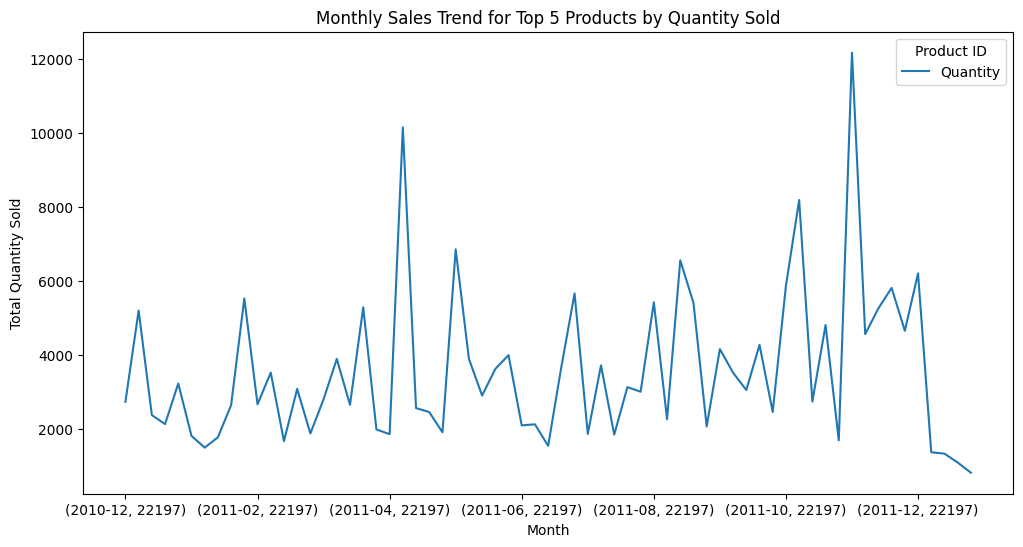

In [35]:
# Step 4: Plot the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line')
plt.title('Monthly Sales Trend for Top 5 Products by Quantity Sold')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Product ID')

# Advanced Machine Learning Analysis with Retail Dataset



## 6. Feature Engineering:

6.1 Extract 'Year', 'Month', 'Day', and 'Hour' from the InvoiceDate and create separate columns for each.


In [36]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

6.2 Create a new column `'ReturnFlag'` where if `'Quantity'` is less than zero, it's 1, otherwise 0. This will indicate whether an item was returned.


In [37]:
df['ReturnFlag'] = (df['Quantity'] < 0).astype(int)
df['ReturnFlag']

0         0
1         0
2         0
3         0
4         0
         ..
541904    0
541905    0
541906    0
541907    0
541908    0
Name: ReturnFlag, Length: 541909, dtype: int32

## 7. Customer Segmentation using Clustering:

7.1. Create a matrix RFM (Recency, Frequency, Monetary) for each customer:
- Recency: Number of days since the last purchase
- Frequency: Number of purchases
- Monetary: Total money spent

In [38]:
#most recent purchase
reference_date = df['InvoiceDate'].max()
reference_date

Timestamp('2011-12-09 12:50:00')

In [39]:
#Group by 'CustomerID' to calculate Recency, Frequency, and Monetary
# Recency: Calculate the number of days since the last purchase for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalPrice': 'sum'  # Monetary
}).reset_index()
rfm
# Rename the columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40
...,...,...,...,...
4367,18280.0,277,1,180.60
4368,18281.0,180,1,80.82
4369,18282.0,7,3,176.60
4370,18283.0,3,16,2094.88


7.2. Normalize the RFM matrix with StandardScaler:

In [40]:
from sklearn.preprocessing import StandardScaler
rfm_values = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()

rfm_scaled = scaler.fit_transform(rfm_values)

rfm_normalized = pd.DataFrame(rfm_scaled, columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'])
rfm_final = pd.concat([rfm[['CustomerID']], rfm_normalized], axis=1)
rfm_final

,CustomerID,Recency_scaled,Frequency_scaled,Monetary_scaled
0,12346.0,2.322023,-0.329362,-0.231001
1,12347.0,-0.893733,0.206102,0.293432
2,12348.0,-0.169196,-0.115176,-0.012316
3,12349.0,-0.725005,-0.436455,-0.017146
4,12350.0,2.163220,-0.436455,-0.190312
...,...,...,...,...
4367,18280.0,1.845615,-0.436455,-0.209026
4368,18281.0,0.882873,-0.436455,-0.221167
4369,18282.0,-0.834182,-0.222269,-0.209513
4370,18283.0,-0.873883,1.169939,0.023900


7.3. Use KMeans clustering to segment customers into different groups. Determine the optimal number of clusters using the Elbow method.

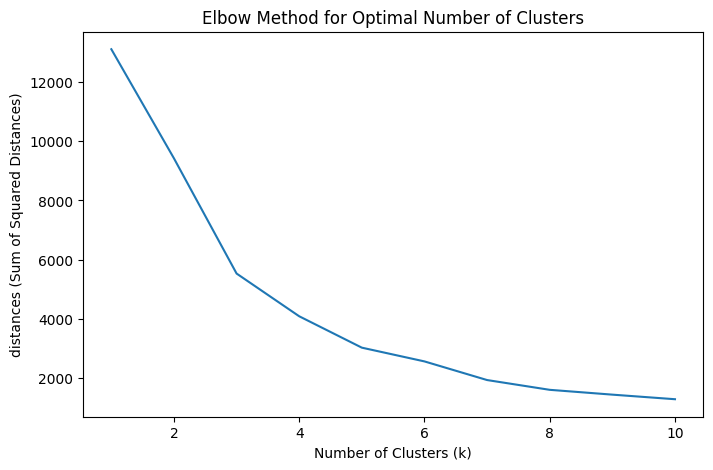

In [41]:
from sklearn.cluster import KMeans
rfm_values_normalized = rfm_final[['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled']]

distances = [] 
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_values_normalized)
    distances.append(kmeans.inertia_) 

plt.figure(figsize=(8, 5))
plt.plot(K, distances)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('distances (Sum of Squared Distances)')



optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=30)
rfm_final['Cluster'] = kmeans.fit_predict(rfm_values_normalized)



## 8. Predictive Analytics:

8.1. Can you predict if a customer will return an item? Use the 'ReturnFlag' as the target variable and build a classification model.

- Split data into training and test sets.
- Use features like 'UnitPrice', 'Quantity', etc.
- Evaluate model accuracy, precision, recall, and F1-score.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X = df[['UnitPrice', 'Quantity']]
y = df['ReturnFlag']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


8.2. Predict the `'TotalPrice'` for an invoice using regression models.
- Consider relevant features and handle categorical ones appropriately (e.g., with one-hot encoding).
- Split data, train the model, and evaluate its performance using metrics like MAE, RMSE, and R^2.

In [46]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder


X = df[['UnitPrice', 'Quantity', 'Country']]  
y = df['TotalPrice']

X = pd.get_dummies(X, columns=['Country'], drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)



In [47]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.09
Root Mean Squared Error (RMSE): 392.04
R² Score: 0.53


## 9. Association Rule Mining:
- 9.1 Identify frequently bought products together. Use the Apriori algorithm to extract meaningful association rules.
- 9.2 Based on the rules, suggest product bundling strategies to the retail store.

In [59]:
from mlxtend.frequent_patterns import apriori, association_rules
# Create a matrix where each transaction (InvoiceNo) is a row and each product (StockCode) is a column
transf = df.groupby(['InvoiceNo', 'StockCode'])['Quantity'].sum().unstack().fillna(0)
#transf

In [58]:
# Convert the quantities to binary (1 or 0) to indicate whether a product was bought or not
# If a product quantity is greater than 0, it will be set to 1 (bought), otherwise 0 (not bought)
basket = transf.applymap(lambda x: 1 if x > 0 else 0)
#basket

In [60]:
# min_support is the threshold for how frequently an itemset must appear in transactions
# Example: min_support=0.05 means the itemset must appear in at least 5% of transactions
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True, low_memory=True)
frequent_itemsets

C:\Users\sonal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
0,0.020000,(15036)
1,0.012394,(15056BL)
2,0.017606,(15056N)
3,0.011197,(16237)
4,0.012432,(20675)
...,...,...
1060,0.010193,"(23199, 85099B, 23203)"
1061,0.011351,"(23202, 85099B, 23203)"
1062,0.010039,"(20724, 20719, 22355, 20723)"
1063,0.010347,"(22411, 85099B, 21931, 22386)"


In [61]:
# We use 'confidence' as the metric to filter the rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(20711),(20712),0.020193,0.033320,0.011158,0.552581,16.583841,0.010485,2.160570,0.959067
1,(20711),(21931),0.020193,0.045714,0.011506,0.569790,12.464149,0.010583,2.218184,0.938726
2,(20711),(22386),0.020193,0.047027,0.010888,0.539197,11.465682,0.009938,2.068070,0.931595
3,(20711),(22411),0.020193,0.045367,0.010270,0.508604,11.210935,0.009354,1.942697,0.929572
4,(20711),(85099B),0.020193,0.080772,0.013282,0.657744,8.143195,0.011651,2.685788,0.895276
...,...,...,...,...,...,...,...,...,...,...
373,"(22698, 22697, 22699)",(22423),0.020927,0.076795,0.011622,0.555351,7.231563,0.010015,2.076253,0.880136
374,"(22423, 22698)","(22697, 22699)",0.015135,0.029653,0.011622,0.767857,25.895182,0.011173,4.179958,0.976157
375,"(22423, 22697)","(22698, 22699)",0.019653,0.023127,0.011622,0.591356,25.569466,0.011167,2.390520,0.980153
376,"(22423, 22699)","(22698, 22697)",0.020270,0.024440,0.011622,0.573333,23.458662,0.011126,2.286468,0.977180


In [62]:
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

               antecedents     consequents   support  confidence       lift
0                  (20711)         (20712)  0.011158    0.552581  16.583841
1                  (20711)         (21931)  0.011506    0.569790  12.464149
2                  (20711)         (22386)  0.010888    0.539197  11.465682
3                  (20711)         (22411)  0.010270    0.508604  11.210935
4                  (20711)        (85099B)  0.013282    0.657744   8.143195
..                     ...             ...       ...         ...        ...
373  (22698, 22697, 22699)         (22423)  0.011622    0.555351   7.231563
374         (22423, 22698)  (22697, 22699)  0.011622    0.767857  25.895182
375         (22423, 22697)  (22698, 22699)  0.011622    0.591356  25.569466
376         (22423, 22699)  (22698, 22697)  0.011622    0.573333  23.458662
377         (22698, 22699)  (22423, 22697)  0.011622    0.502504  25.569466

[378 rows x 5 columns]


In [66]:
#pip install apyori

In [ ]:
#Second method...Need to check more on this

In [68]:
from apyori import apriori

# Prepare the data: each transaction should be a list of items bought together
transactions = df.groupby('InvoiceNo')['StockCode'].apply(list).tolist()

# Apply the Apriori algorithm
results = apriori(transactions, min_support=0.01, min_confidence=0.5, min_lift=1.2)

# Convert results to a list
rules = list(results)

# Print each rule
for rule in rules:
    for ordered_stat in rule.ordered_statistics:
        antecedent = list(ordered_stat.items_base)  # LHS of the rule
        consequent = list(ordered_stat.items_add)   # RHS of the rule
        print(f"Rule: {antecedent} -> {consequent}")
        print(f"Support: {rule.support}")
        print(f"Confidence: {ordered_stat.confidence}")
        print(f"Lift: {ordered_stat.lift}\n")


Rule: ['20711'] -> ['20712']
Support: 0.011158301158301158
Confidence: 0.543233082706767
Lift: 16.1350193143409

Rule: ['20711'] -> ['21931']
Support: 0.011505791505791505
Confidence: 0.5601503759398496
Lift: 12.079845742582936

Rule: ['20711'] -> ['22386']
Support: 0.010888030888030888
Confidence: 0.5300751879699249
Lift: 11.152678609602807

Rule: ['20711'] -> ['22411']
Support: 0.01027027027027027
Confidence: 0.5
Lift: 10.909856781802866

Rule: ['20711'] -> ['85099B']
Support: 0.013436293436293436
Confidence: 0.6541353383458647
Lift: 7.935412301244916

Rule: ['20711'] -> ['DOT']
Support: 0.01054054054054054
Confidence: 0.5131578947368421
Lift: 18.719421793921423

Rule: ['20712'] -> ['21931']
Support: 0.017374517374517374
Confidence: 0.5160550458715597
Lift: 11.128913978412486

Rule: ['20712'] -> ['85099B']
Support: 0.020772200772200773
Confidence: 0.6169724770642203
Lift: 7.48458414799218

Rule: ['DOT'] -> ['20712']
Support: 0.013938223938223937
Confidence: 0.5084507042253521
Lift: 1

# Advanced EDA Techniques:

11. Pareto Analysis (80/20 Rule):
- Identify the 20% of the products that generate 80% of the revenue.
- Conversely, identify the 20% of the customers responsible for 80% of the sales.    

12. Time-Series Anomalies:
- Detect any anomalies or outliers in the sales data over time using rolling averages or other advanced methods.

# Advanced Modeling Techniques:

13. Market Basket Analysis Enhancements:
- Dig deeper into association rules. For instance, find rules with a high lift and high confidence.
- Analyze antecedents with more than one item, which can give bundled product suggestions.

## 14. Product Recommendation Systems:
- Develop a system to recommend products to users.
- Consider collaborative filtering techniques, matrix factorization, or deep learning-based approaches like neural collaborative filtering.

## 15. Churn Prediction:
- Predict if a customer will stop buying products in the near future.
- Features can include Recency, Frequency, Monetary values, average time between purchases, total categories bought, etc.

## 16. Hyperparameter Tuning and Model Optimization:
- For any given machine learning model you use, apply techniques like grid search or random search for hyperparameter tuning.
- Use ensemble methods (e.g., stacking, bagging, boosting) to enhance prediction performance.